In [27]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from fiona.crs import from_epsg
from fiona.crs import from_epsg
from PIL import Image
from geopandas.tools import sjoin

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
    
%matplotlib inline

In [3]:
nh_shp = gpd.read_file("nynta_18d/nynta.shp")

In [4]:
nh_shp.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN51,Murray Hill,33266.904861,5.248828e+07,"POLYGON ((1038593.459228516 221913.3550415039,..."
2,4,Queens,081,QN27,East Elmhurst,19816.712318,1.972685e+07,"POLYGON ((1022728.275024414 217530.8082275391,..."
3,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.66003418 201007.0130004883, ..."
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.2606201172 238490.1047973633,..."


In [6]:
[a for a in nh_shp.NTAName if 'Ben' in a]

['Bensonhurst East', 'Bensonhurst West']

In [7]:
nh_shp.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

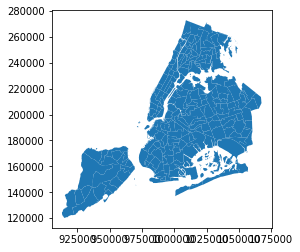

In [22]:
nh_shp.plot()

In [110]:
neighborhood = 'Manhattanville'

In [87]:
neighbourhood_shp = nh_shp[nh_shp.NTAName == neighborhood]
neighbourhood_shp.shape

(1, 8)

('streets.gz', <http.client.HTTPMessage at 0x7f527c09f278>)

In [12]:
!unzip streets.gz

Archive:  streets.gz
  inflating: geo_export_fe7d31d3-42fd-4a0f-b268-d6e82470d6c0.dbf  
  inflating: geo_export_fe7d31d3-42fd-4a0f-b268-d6e82470d6c0.shp  
  inflating: geo_export_fe7d31d3-42fd-4a0f-b268-d6e82470d6c0.shx  
  inflating: geo_export_fe7d31d3-42fd-4a0f-b268-d6e82470d6c0.prj  


In [13]:
streets_shp = gpd.read_file("geo_export_fe7d31d3-42fd-4a0f-b268-d6e82470d6c0.shp")

In [14]:
streets_shp.crs

{}

In [65]:
streets_shp.head()

,bike_lane,bike_trafd,borocode,date_creat,time_creat,frm_lvl_co,full_stree,l_blkfc_id,l_high_hn,l_low_hn,...,rw_type,shape_leng,snow_pri,st_label,st_name,st_width,status,to_lvl_co,trafdir,geometry
0,None,None,2,2014-08-19,00:00:00.000,13.0,MITSUBISHI WILD WETLAND TRL,0.000000e+00,None,None,...,6.0,1026.077523,None,MITSUBISHI WILD WETLAND TRL,MITSUBISHI WILD WETLAND,0.0,2,13.0,NV,LINESTRING (-73.87861544017795 40.861915301539...
1,None,None,4,2007-11-29,00:00:00.000,13.0,28 AVE,1.122612e+08,215-027,215-001,...,1.0,258.859740,S,28 AV,28,35.0,2,13.0,TW,LINESTRING (-73.7729030190404 40.7778042809822...
2,2,TW,3,2007-11-29,00:00:00.000,13.0,SCHERMERHORN ST,1.922604e+09,399,317,...,1.0,609.424375,C,SCHERMERHORN ST,SCHERMERHORN,50.0,2,13.0,TW,LINESTRING (-73.98181677514282 40.687329801759...
3,None,None,4,2007-11-29,00:00:00.000,13.0,QUEENS BLVD,9.226172e+07,120-011,120-011,...,1.0,47.399228,C,QUEENS BLVD,QUEENS,40.0,2,13.0,TF,LINESTRING (-73.8300230194527 40.7140059978106...
4,None,None,2,2007-11-29,00:00:00.000,13.0,ARLINGTON AVE,1.522605e+09,5699,5631,...,1.0,454.932922,H,ARLINGTON AV,ARLINGTON,42.0,2,13.0,TW,LINESTRING (-73.90711253281893 40.905186250792...


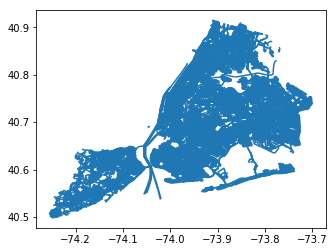

In [47]:
streets_shp.plot()

In [58]:
neighbourhood_shp = neighbourhood_shp.to_crs(epsg = 2263)

In [93]:
nh_shp.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

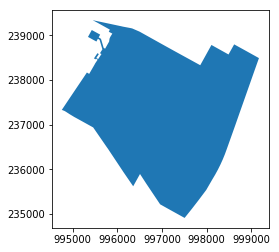

In [92]:
neighbourhood_shp = nh_shp[nh_shp.NTAName == neighborhood]
neighbourhood_shp.shape
neighbourhood_shp = neighbourhood_shp.to_crs({'init': 'epsg:2263'})
neighbourhood_shp.plot()

In [81]:
tmp = gpd.GeoDataFrame(neighbourhood_shp, geometry='geometry', crs=streets_shp.crs)
tmp.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.2606201175 238490.1047973094,..."


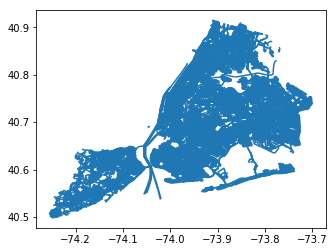

In [76]:
streets_shp.plot()

In [77]:
streets_shp.crs

{'init': 'epsg:2263', 'no_defs': True}

In [61]:
streets_shp.crs = from_epsg(2263)
streets_shp.crs

{'init': 'epsg:2263', 'no_defs': True}

In [66]:
gpd.sjoin?

In [71]:
neigh_street_shp = gpd.sjoin(neighbourhood_shp, streets_shp, how='inner', op='contains')

In [72]:
neigh_street_shp.shape

(0, 42)

In [37]:
neigh_street_shp.columns

Index(['BoroCode', 'BoroName', 'CountyFIPS', 'NTACode', 'NTAName',
       'Shape_Leng', 'Shape_Area', 'geometry', 'index_right', 'bike_lane',
       'bike_trafd', 'borocode', 'date_creat', 'time_creat', 'frm_lvl_co',
       'full_stree', 'l_blkfc_id', 'l_high_hn', 'l_low_hn', 'l_zip',
       'date_modif', 'time_modif', 'physicalid', 'post_direc', 'post_modif',
       'post_type', 'pre_direct', 'pre_modifi', 'pre_type', 'r_blkfc_id',
       'r_high_hn', 'r_low_hn', 'r_zip', 'rw_type', 'shape_leng', 'snow_pri',
       'st_label', 'st_name', 'st_width', 'status', 'to_lvl_co', 'trafdir'],
      dtype='object')

In [38]:
neigh_street_shp.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,index_right,bike_lane,...,r_zip,rw_type,shape_leng,snow_pri,st_label,st_name,st_width,status,to_lvl_co,trafdir


In [94]:
nh2_shp = gpd.read_file("NeighborhoodNames/geo_export_59621e69-caf1-4d5e-a988-0ef37a810397.shp")

In [95]:
nh2_shp.crs

{}

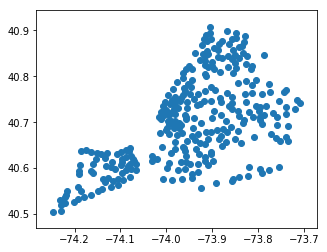

In [96]:
nh2_shp.plot()

In [97]:
nh2_shp.head()

,annoangle,annoline1,annoline2,annoline3,borough,name,objectid,stacked,geometry
0,0.0,Wakefield,None,None,Bronx,Wakefield,1.0,1.0,POINT (-73.84720052054909 40.89470517661004)
1,0.0,Co-op,City,None,Bronx,Co-op City,2.0,2.0,POINT (-73.82993910812405 40.87429419303015)
2,0.0,Eastchester,None,None,Bronx,Eastchester,3.0,1.0,POINT (-73.82780644716419 40.88755567735082)
3,0.0,Fieldston,None,None,Bronx,Fieldston,4.0,1.0,POINT (-73.90564259591689 40.89543742690388)
4,0.0,Riverdale,None,None,Bronx,Riverdale,5.0,1.0,POINT (-73.91258546108577 40.89083449389134)


In [100]:
nh3_shp = gpd.read_file("NeighborhoodTabulationAreas/geo_export_73308203-4c58-45ef-8475-d60695a6afb4.shp")

In [101]:
nh3_shp.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904861,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...


In [102]:
nh3_shp.crs

{}

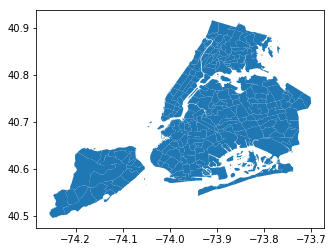

In [103]:
nh3_shp.plot()

In [107]:
[a for a in nh3_shp.ntaname if 'Ben' in a]

['Bensonhurst East', 'Bensonhurst West']

In [108]:
nh3_shp.crs = from_epsg(2263)
nh3_shp.crs

{'init': 'epsg:2263', 'no_defs': True}

In [111]:
neighbourhood_shp = nh3_shp[nh3_shp.ntaname == neighborhood]
neighbourhood_shp.shape

(1, 8)

In [112]:
neigh_street_shp = gpd.sjoin(neighbourhood_shp, streets_shp, how='inner', op='intersects')

In [113]:
neigh_street_shp.shape

(251, 42)

In [114]:
streets_shp.shape

(119309, 34)

In [115]:
len(set(streets_shp.st_name))

7174